## 1 numpy创建数组，修改形状等

In [2]:
import numpy as np

x = np.arange(12)
X = x.reshape(3, 4)
x, X

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]))

## 2 输出糖尿病数据集所有变量值和数组形状

In [5]:
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn import linear_model, metrics

diabetes = load_diabetes() # 载入数据集 

diabetes.data, diabetes.data.shape # 输出数据集和维度


(array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 (442, 10))

可以看到，特征数是10，样本共有442个，是一个二维数组


## 3 输出糖尿病数据集所有样本真实值标签和数组形状

In [6]:
## diabetes.target # 输出真实标签, 维度为442的向量
diabetes.target[:20], diabetes.target.shape # 输出前20个，方便截图

(array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.]),
 (442,))

## 4 输出测试数据散点图

我的学号是2019210517，对应输出红色方形

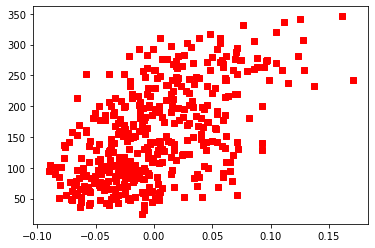

In [7]:
diabetes = load_diabetes() 
diabetes_X = diabetes.data[:, 2] 
diabetes_X_train = diabetes_X[:-20] 
diabetes_y_train = diabetes.target[:-20] 
plt.scatter(diabetes_X_train, diabetes_y_train, color='red', marker='s')
plt.show()

直观上看，可以看出X和Y之间的二维线性相关性了。

## 5 解释diabetes_X_train = ... 的语句意义

In [8]:
diabetes_X_train.shape, diabetes_X_train

((422,),
 array([ 0.06169621, -0.05147406,  0.04445121, -0.01159501, -0.03638469,
        -0.04069594, -0.04716281, -0.00189471,  0.06169621,  0.03906215,
        -0.08380842,  0.01750591, -0.02884001, -0.00189471, -0.02560657,
        -0.01806189,  0.04229559,  0.01211685, -0.0105172 , -0.01806189,
        -0.05686312, -0.02237314, -0.00405033,  0.06061839,  0.03582872,
        -0.01267283, -0.07734155,  0.05954058, -0.02129532, -0.00620595,
         0.04445121, -0.06548562,  0.12528712, -0.05039625, -0.06332999,
        -0.03099563,  0.02289497,  0.01103904,  0.07139652,  0.01427248,
        -0.00836158, -0.06764124, -0.0105172 , -0.02345095,  0.06816308,
        -0.03530688, -0.01159501, -0.0730303 , -0.04177375,  0.01427248,
        -0.00728377,  0.0164281 , -0.00943939, -0.01590626,  0.0250506 ,
        -0.04931844,  0.04121778, -0.06332999, -0.06440781, -0.02560657,
        -0.00405033,  0.00457217, -0.00728377, -0.0374625 , -0.02560657,
        -0.02452876, -0.01806189, -0.01482

In [9]:
diabetes_X_train = np.array(diabetes_X_train).reshape(-1, 1)
diabetes_X_train.shape, diabetes_X_train

((422, 1),
 array([[ 0.06169621],
        [-0.05147406],
        [ 0.04445121],
        [-0.01159501],
        [-0.03638469],
        [-0.04069594],
        [-0.04716281],
        [-0.00189471],
        [ 0.06169621],
        [ 0.03906215],
        [-0.08380842],
        [ 0.01750591],
        [-0.02884001],
        [-0.00189471],
        [-0.02560657],
        [-0.01806189],
        [ 0.04229559],
        [ 0.01211685],
        [-0.0105172 ],
        [-0.01806189],
        [-0.05686312],
        [-0.02237314],
        [-0.00405033],
        [ 0.06061839],
        [ 0.03582872],
        [-0.01267283],
        [-0.07734155],
        [ 0.05954058],
        [-0.02129532],
        [-0.00620595],
        [ 0.04445121],
        [-0.06548562],
        [ 0.12528712],
        [-0.05039625],
        [-0.06332999],
        [-0.03099563],
        [ 0.02289497],
        [ 0.01103904],
        [ 0.07139652],
        [ 0.01427248],
        [-0.00836158],
        [-0.06764124],
        [-0.0105172 ],


可以看到，diabetes_X_train从一个长度为422的数组变成了一个维度(422, 1)的向量。

结合官方API文档中reshape()函数的用法，可知参数"-1"是自动计算该维度，保持元素总个数不变。</br>
第二个参数"1"则是指定diabetes_X_train的第二个维度必须是1。

## 6 线性回归回归系数计算

回归系数(regression coefficient)在回归方程中表示自变量对因变量影响大小的参数，即权重。

In [10]:
# Split the data into training/testing sets 
diabetes_X_train = diabetes_X[:-20] 
diabetes_X_test = diabetes_X[-20:]
diabetes_y_train = diabetes.target[:-20] 
diabetes_y_test = diabetes.target[-20:]

# reshape
diabetes_X_train = np.array(diabetes_X_train).reshape(-1, 1)
diabetes_X_test = np.array(diabetes_X_test).reshape(-1, 1)

# Create linear regression object 
regr = linear_model.LinearRegression()
# Train the model using the training sets 
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set 
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients 
print('回归系数 Coefficients: ', regr.coef_)
# The mean squared error 
print("均方误差 Mean squared error: %.2f" % metrics.mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction 
print('R^2分数 Variance score: %.2f' % metrics.r2_score(diabetes_y_test, diabetes_y_pred))

回归系数 Coefficients:  [938.23786125]
均方误差 Mean squared error: 2548.07
R^2分数 Variance score: 0.47


可以看到，训练采用训练集个数422个，测试集个数20个的比例，这是可以调整的地方。

## 7 线性回归的回归结果折线图以及散点图表示

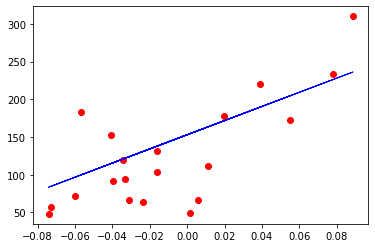

In [11]:
# Plot outputs 
plt.scatter(diabetes_X_test, diabetes_y_test, color='red') 
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=1) 
plt.show()

可以看到，模型预测的结果是线性的，在小数据样本训练下，与数据的拟合程度一般(0.47)。

## 8 多标签鸢尾花数据的逻辑回归的回归系数计算

In [12]:
clf = linear_model.LogisticRegression(C=1e5)
clf

LogisticRegression(C=100000.0)

In [13]:
from sklearn.datasets import load_iris

iris = load_iris() # 载入数据集
iris.data, iris.target # 数据，标签

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

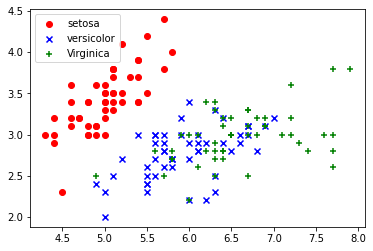

In [14]:
# 获取花卉两列数据集 
DD = iris.data 
X = [x[0] for x in DD] 
Y = [x[1] for x in DD] 
 
# 前50个样本,代表第一类 
plt.scatter(X[:50], Y[:50], color='red', marker='o', label='setosa')
# 中间50个,代表第二类 
plt.scatter(X[50:100], Y[50:100], color='blue', marker='x', label='versicolor') 
# 后50个样本,代表第三类 
plt.scatter(X[100:], Y[100:],color='green', marker='+', label='Virginica') 

plt.legend(loc=2)
plt.show()

可以看到，目前有三类数据需要分类，且有一定的交叠，我们需要通过逻辑回归线性分割开这三个区域。

In [15]:
## 重新获取两列数据集
X = iris.data[:, :2]   
Y = iris.target

# meshgrid函数生成两个网格矩阵
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01), np.arange(y_min, y_max, .01))

# 展平成一维数组
xx.ravel()
yy.ravel()

# 合并成一个数组
np.c_[xx.ravel(), yy.ravel()]

array([[3.8 , 1.5 ],
       [3.81, 1.5 ],
       [3.82, 1.5 ],
       ...,
       [8.38, 4.9 ],
       [8.39, 4.9 ],
       [8.4 , 4.9 ]])

如上的数据预处理过程是将喂入数据坐标范围统一起来存入数组。

In [16]:
clf.fit(X, Y) # 喂入数据集
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # 做出预测

最终，我们可以对结果计算回归系数。

In [17]:
# 逻辑回归的回归系数
print('回归系数:\n', clf.coef_)

回归系数:
 [[-36.45485257  30.74790249]
 [ 17.27627017 -15.57630033]
 [ 19.1785824  -15.17160217]]


这里得出的矩阵，就是权重矩阵W。每组数对应结果中的分割线(区域的分割)。

## 9 逻辑回归散点图表示

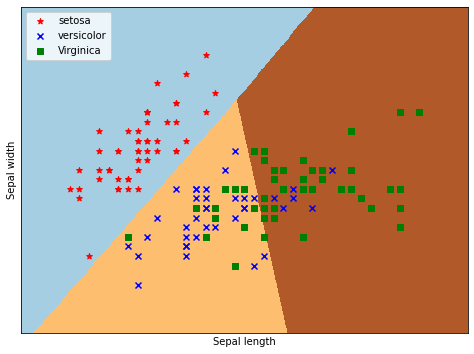

In [18]:
# 可视化
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8,6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')

plt.scatter(X[:50,0], X[:50,1], color='red',marker='*', label='setosa')
plt.scatter(X[50:100,0], X[50:100,1], color='blue', marker='x', label='versicolor')
plt.scatter(X[100:,0], X[100:,1], color='green', marker='s', label='Virginica') 
 
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.legend(loc=2) 
plt.show()

## 选做1, 2, 5 通过MSE对不同参数的回归能力衡量， 使用了matplotlib绘制表格和训练曲线， 并尝试了更多数据集（经典的fashion-mnist）并基于此对逻辑回归的调参深入讨论

由于题目没有明确说明，在此只对逻辑回归进行多参数比较（线性回归）。

上文中为了方便生成图片，所以做了特殊处理，一般的逻辑回归实现如下。

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 加载数据
iris = load_iris()
X = iris.data[:, :2]  
Y = iris.target

# 测试集、训练集，注意到使用随机种子以便比较各种结果
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# 标准化特征值
sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)


# 训练
reg = linear_model.LogisticRegression(C=1e5, tol=0.00001, max_iter=100)
reg.fit(X_train, Y_train)

# 预测
predict = reg.predict(X_test) # predict_proba 取softmax后即为 predict函数所实现的功能，为了保持维度一致，在此更改
acc = reg.score(X_test,Y_test)
acc

0.8

经过训练和测试过程，通过reg.score得到准确率(accuracy)，值是0.8。下面加上均方误差。

In [20]:
print("均方误差 Mean squared error: %.5f" % metrics.mean_squared_error(Y_test, predict))

均方误差 Mean squared error: 0.20000


可以看到，均方误差是0.2，如下对各种参数和超参数进行讨论。

* 测试集和训练集的比例：通常在小样本的学习过程中，使用8:2或者7:3划分训练集和测试集（验证集），而在大模型训练上往往测试集远小于训练集。值得注意的是，本例子中的测试集其实是指验证集(dev set)，用于调参优化的数据集样本，实际中项目开发还需要准备一个测试集以便测试最终结果。
   
    上例中使用了7:3的比例，可以通过test_size来调整该指标。
    
下面给出LogisticRegression的接口。


可以看到，有很多超参数可以通过函数接口调整，包括（这里仅列出主流的）：
* penalty='l2' : 字符串'l1'或'l2'，默认'l2'。
  用来指定惩罚的基准，也就是著名的正则化参数(regularization)，'l1'和'l2'指不同范数。正则化是Loss函数最后的特殊增加项，为防止过拟合从而加入权重，使得权重大小得到抑制，很难过拟合和发生梯度问题。不过最近发现，似乎正则化似乎没有那么重要🤪。
* C=1.0 : C为正则化系数λ的倒数，必须为正数，默认为1。和SVM中的C一样，值越小，代表正则化越强。
* max_iter=100 : 算法收敛的最大迭代次数。

除此以外，常见的还有学习率alpha、优化中的动量beta、以及小批量梯度batch等等参数可以微调，并通过不同组合的方式微调。

下面给出针对鸢尾花（小数据集）的代码实现，由于l1正则不适用于lbfgs算法，且常用l2，故不考虑。max_iter实际上也不常去调整，故省略。

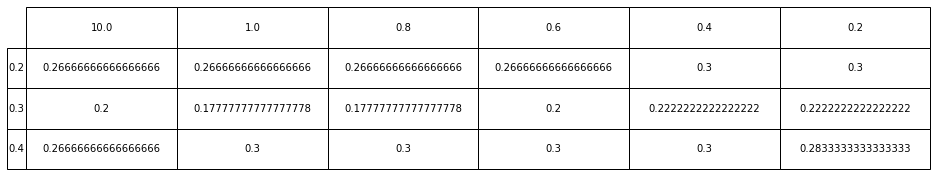

In [22]:
# 对上述的参数进行组合，并对MSE进行比较

test_size = [0.2, 0.3, 0.4] # 不同的划分比例
C = [10, 1.0, 0.8, 0.6, 0.4, 0.2] # 不同的正则化系数
MSE = [] # 结果存入列表，是二维数组


for t in test_size:
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=t, random_state=0)
    
    mse_t = []
    
    for c in C:
        sc = StandardScaler()
        sc.fit(X_train)

        X_train = sc.transform(X_train)
        X_test = sc.transform(X_test)

        reg = linear_model.LogisticRegression(C=c)
        reg.fit(X_train, Y_train)

        predict = reg.predict(X_test)
        mse = metrics.mean_squared_error(Y_test, predict)
        mse_t.append(mse)
        
    MSE.append(mse_t)
    

from matplotlib import pyplot as plt
import pandas as pd

def plot_table(row, col, vals): # 实现一个二维图表制作函数，将MSE打印出来
    
    R, C = len(row), len(col)
    
    df = pd.DataFrame(np.random.randn(R, C), index=row, columns=col)
    
    # 根据行数列数设置表格大小
    figC, figR = 2.25*C, R
    fig = plt.figure(figsize=(figC, figR))
    
    # 设置fig并去掉边框
    ax = fig.add_subplot(111, frameon=True, xticks=[], yticks=[])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    the_table=plt.table(cellText=vals, rowLabels=df.index, colLabels=df.columns, 
                        colWidths = [0.1]*vals.shape[1], rowLoc='center', loc='center',cellLoc='center')
    the_table.set_fontsize(20)
    
    # 伸缩表格大小常数
    the_table.scale(figR/R*2 ,figC/C*1.5)
    
MSE = np.array(MSE)

plot_table(test_size, C, MSE) # 打印

可以看到，表格中给出了不同参数下的均方误差，其中在划分比例为0.3，正则化系数的倒数为 >10 和 0.6 的时候取到0.2极小值。

由于上面的实现是基于很小的数据库进行的逻辑回归，无法对诸如学习率、batch_size等超参数进行调参和比对，所以再次使用更大的数据集——典中典的fashion_mnist数据集实现一个逻辑回归（同样是多类的softmax回归）。

在实现之前，先对涉及的模型和训练参数进行讨论：
* batch_size ： 小批量梯度下降训练，通过将大数据集分成小batch喂入网络并反向传播，使得收敛过程更加迅速和高效，先设为256。
* num_epochs ： 训练迭代轮数，即滚动训练集的次数，设为10次。
* lr ： 学习率，即反向传播过程梯度的更新程度，暂时设为0.1。

其中，学习率太大可能会导致无法收敛，太小则速度太慢，是关键超参数。
前两者也可以调试，通常epoch数量还可以更大，不过过大有可能导致过拟合（高偏差 high variance）问题。


In [149]:
from IPython import display
import torch 
from torch import nn
from torch.utils import data
import torchvision
from torchvision import transforms

batch_size = 256
num_epochs = 10
lr = 0.1

def load_data_fashion_mnist(batch_size, resize=None):
    """下载Fashion-MNIST数据集，然后将其加载到内存中。"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root="../data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="../data", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=4),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=4))


train_iter, test_iter = load_data_fashion_mnist(batch_size)

将展平每个图像，把它们看作长度为784的向量。
因为我们的数据集有10个类别，所以网络输出维度为10。

In [150]:
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10)) # 定义网络，第一层拉平为一维向量

def init_weights(m): # m是一个net遍历的每个层
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

在交叉熵损失函数中传递未规范化的预测，并同时计算softmax及其对数。

In [151]:
loss = nn.CrossEntropyLoss()

使用学习率为0.1的小批量随机梯度下降作为优化算法。

In [152]:
trainer = torch.optim.SGD(net.parameters(), lr=lr)

实现训练函数和子函数，以及绘图函数。

In [153]:
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
        """设置matplotlib的轴。"""
        axes.set_xlabel(xlabel)
        axes.set_ylabel(ylabel)
        axes.set_xscale(xscale)
        axes.set_yscale(yscale)
        axes.set_xlim(xlim)
        axes.set_ylim(ylim)
        if legend:
            axes.legend(legend)
        axes.grid()
        
class Accumulator:
    """在`n`个变量上累加。"""
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

class Animator:
    """使用matplotlib在动画中绘制数据。"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        
        # 增量地绘制多条线
        if legend is None:
            legend = []
        display.set_matplotlib_formats('svg')
        self.fig, self.axes = plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # 使用lambda函数捕获参数
        self.config_axes = lambda: set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts
    
    def add(self, x, y):
        # 向图表中添加多个数据点
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)
        
    def save(self, num_epochs, lr, batch_size):
        plt.savefig("./data/capture{} {} {}.png".format(num_epochs, lr, batch_size))
        # plt.savefig('./data/capture/cap.png')
        
def evaluate_accuracy(net, data_iter):
    """计算在指定数据集上模型的精度。"""
    metric = Accumulator(2)  # 正确预测数、预测总数
    for X, y in data_iter:
        size = lambda x, *args, **kwargs: x.numel(*args, **kwargs)
        metric.add(accuracy(net(X), y), size(y))
    return metric[0] / metric[1]

        
def accuracy(y_hat, y):
    """计算预测正确的数量。
    Defined in :numref:`sec_softmax_scratch`"""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        argmax = lambda x, *args, **kwargs: x.argmax(*args, **kwargs)
        y_hat = argmax(y_hat, axis=1)
      
    astype = lambda x, *args, **kwargs: x.type(*args, **kwargs)
    cmp = astype(y_hat, y.dtype) == y
    reduce_sum = lambda x, *args, **kwargs: x.sum(*args, **kwargs)
    return float(reduce_sum(astype(cmp, y.dtype)))

def train_epoch(net, train_iter, loss, updater):
    """训练模型一个迭代周期。"""
    # 将模型设置为训练模式
    if isinstance(net, torch.nn.Module):
        net.train()
    # 训练损失总和、训练准确度总和、样本数
    metric = Accumulator(3)
    for X, y in train_iter:
        # 计算梯度并更新参数
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            # 使用PyTorch内置的优化器和损失函数
            updater.zero_grad()
            l.backward()
            updater.step()
            metric.add(float(l) * len(y), accuracy(y_hat, y),
                       y.size().numel())
        else:
            # 使用定制的优化器和损失函数
            l.sum().backward()
            updater(X.shape[0])
            metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    # 返回训练损失和训练精度
    return metric[0] / metric[2], metric[1] / metric[2]

def train(net, train_iter, test_iter, loss, num_epochs, updater):
    """训练模型。"""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['mse loss', 'train acc', 'test acc'])
    
    for epoch in range(num_epochs):
        train_metrics = train_epoch(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))

        
    mse_loss, train_acc = train_metrics # 计算误差
    
    assert mse_loss < 0.5, mse_loss # 使得绘图更直观，去掉初始部分
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

我们来训练模型并给出预测，最终绘制准确率和MSE误差图像走线。

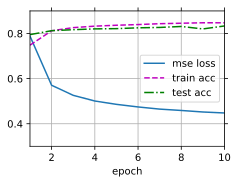

In [101]:
train(net, train_iter, test_iter, loss, num_epochs, trainer)

此处的训练图中的曲线，loss在随着迭代数不断下降，acc准确度不断升高，二者逐渐收敛趋于直线。

下面我们对不同超参数组合(batch_size, num_epoch, lr)分别进行训练。

AssertionError: 0.6834833333333333

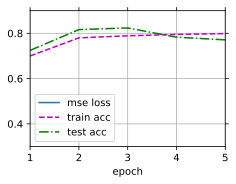

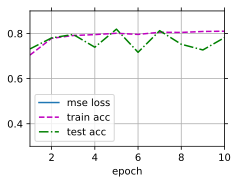

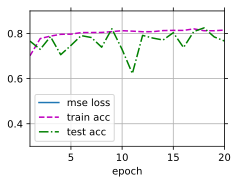

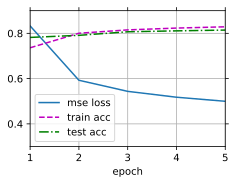

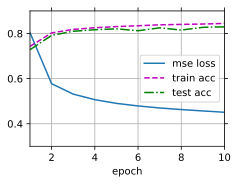

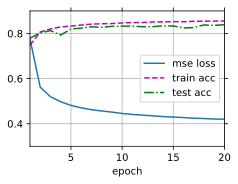

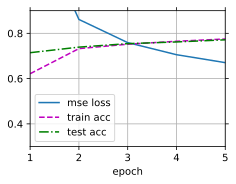

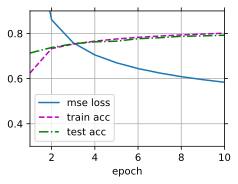

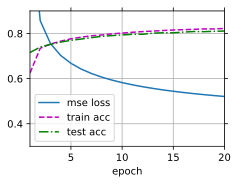

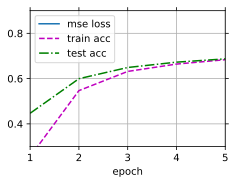

In [156]:
batch_size = [256, 128]
num_epochs = [5, 10, 20]
lr = [1, 0.1, 0.01, 0.001]

def train(net, train_iter, test_iter, loss, num_epochs, updater, lr, batch_size):
    """训练模型。重写模型为输出mse，不再画图，否则内存占用量大。"""
    
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['mse loss', 'train acc', 'test acc'])
    
    for epoch in range(num_epochs):
        train_metrics = train_epoch(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
        
    mse_loss, train_acc = train_metrics # 计算误差
    
    assert mse_loss < 1.8, mse_loss # 使得绘图更直观，去掉初始部分
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc
    
    animator.save(num_epochs, lr, batch_size)
    

# 开始多参数组合训练并存储结果打印

for batch in batch_size:
    
    train_iter, test_iter = load_data_fashion_mnist(batch)
    net.apply(init_weights);
    
    for lr in lr: 
        
        trainer = torch.optim.SGD(net.parameters(), lr=lr)
        
        for num_epoch in num_epochs:
            net.apply(init_weights); # 每次都初始化权重，保证
            train(net, train_iter, test_iter, loss, num_epoch, trainer, lr, batch)

让我们将部分结果展现出来，可以看到，学习率太小和太大都不好，批量大小适中最好。

经过比对，其中（num_epochs: 20, lr: 0.1, batch_size: 256）这一组训练结果最优，MSE指标平稳降低到最低。

In [170]:
from IPython.display import HTML, display
display(HTML("<text>5, 128, lr=all</text>"
            "<table><tr><td><img src='./data/capture5 1 128.png'></td><td><img src='./data/capture5 0.1 128.png'></td></tr><tr><td><img src='./data/capture5 0.01 128.png'></td><td><img src='./data/capture5 0.001 128.png'></td></tr></table>"
             "<text>5, 256, lr=all</text>"
            "<table><tr><td><img src='./data/capture5 1 256.png'></td><td><img src='./data/capture5 0.1 256.png'></td></tr><tr><td><img src='./data/capture5 0.01 256.png'></td><td><img src='./data/capture5 0.001 256.png'></td></tr></table>"
             "<text>10, 128, lr=all</text>"
            "<table><tr><td><img src='./data/capture10 1 128.png'></td><td><img src='./data/capture10 0.1 128.png'></td></tr><tr><td><img src='./data/capture10 0.01 128.png'></td><td><img src='./data/capture10 0.001 128.png'></td></tr></table>"
             "<text>10, 256, lr=all</text>"
            "<table><tr><td><img src='./data/capture10 1 256.png'></td><td><img src='./data/capture10 0.1 256.png'></td></tr><tr><td><img src='./data/capture10 0.01 256.png'></td><td><img src='./data/capture10 0.001 256.png'></td></tr></table>"
             "<text>20, 128, lr=all</text>"
            "<table><tr><td><img src='./data/capture20 1 128.png'></td><td><img src='./data/capture20 0.1 128.png'></td></tr><tr><td><img src='./data/capture20 0.01 128.png'></td><td><img src='./data/capture20 0.001 128.png'></td></tr></table>"
             "<text>20, 256, lr=all</text>"
            "<table><tr><td><img src='/data/capture20 1 256.png'></td><td><img src='./data/capture20 0.1 256.png'></td></tr><tr><td><img src='./data/capture20 0.01 256.png'></td><td><img src='./data/capture20 0.001 256.png'></td></tr></table>"
            ))


,
,
,
,
,
,
,
,
,
,
,


## 10 鸢尾花数据的K-means聚类（聚类中心为3）结果图

In [171]:
from sklearn.cluster import KMeans

iris = load_iris()

X = [x[0] for x in iris.data] 
Y = [x[1] for x in iris.data] 

# 数据维度处理，注意是二维
X = np.array(X).reshape(-1, 2)
Y = np.array(Y).reshape(-1, 2)

构造聚类模型并聚类。

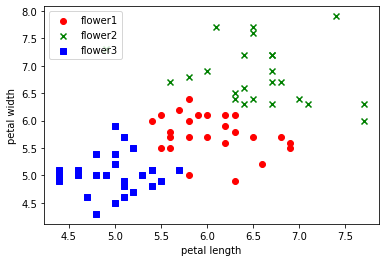

In [64]:
estimator = KMeans(n_clusters=3)

# 聚类
estimator.fit(X)

# 获取聚类标签
label_pred = estimator.labels_

# 可视化
x0 = X[label_pred == 0]
x1 = X[label_pred == 1]
x2 = X[label_pred == 2]

plt.scatter(x0[:, 0], x0[:, 1], c = "red", marker='o', label='flower1')
plt.scatter(x1[:, 0], x1[:, 1], c = "green", marker='x', label='flower2')
plt.scatter(x2[:, 0], x2[:, 1], c = "blue", marker='s', label='flower3')

plt.xlabel('petal length')
plt.ylabel('petal width')

plt.legend(loc=2)
plt.show()

可以看到，三种花所代表的点以三个聚类中心聚集。

## 选做3 不同聚类数量的区别

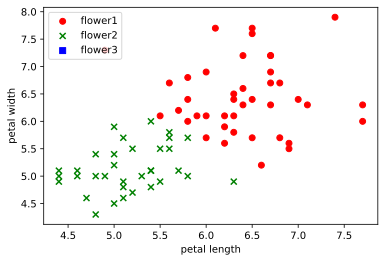

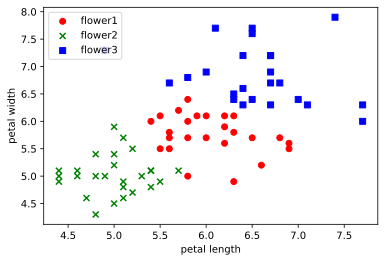

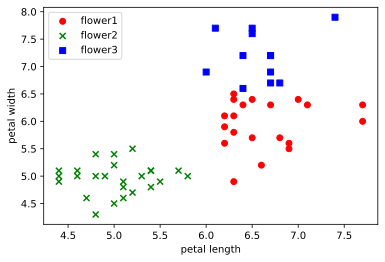

In [172]:
list = range(2,5)
for n in list:
    estimator = KMeans(n_clusters=n)

    # 聚类
    estimator.fit(X)

    # 获取聚类标签
    label_pred = estimator.labels_

    # 可视化
    x0 = X[label_pred == 0]
    x1 = X[label_pred == 1]
    x2 = X[label_pred == 2]

    plt.scatter(x0[:, 0], x0[:, 1], c = "red", marker='o', label='flower1')
    plt.scatter(x1[:, 0], x1[:, 1], c = "green", marker='x', label='flower2')
    plt.scatter(x2[:, 0], x2[:, 1], c = "blue", marker='s', label='flower3')

    plt.xlabel('petal length')
    plt.ylabel('petal width')

    plt.legend(loc=2)
    plt.show()